## 1. Analyzing the Wikipedia voters network

In [2]:
import snap

# Read graph data
G1 = snap.LoadEdgeList(snap.PNGraph, 'wiki-Vote.txt', 0, 1)

In [3]:
# The number of nodes in the network
print(f'# of node: {G1.GetNodes()}')

# of node: 7115


In [4]:
# The number of nodes with a self-edge
self_edges = [edge for edge in G1.Edges() if edge.GetSrcNId() == edge.GetDstNId()]
print(f'# of self-edge: {len(self_edges)}')

# 자기 자신에게 투표하는 것은 없다.

# of self-edge: 0


In [5]:
# The number of directed edges in the network
non_self_edges = [edge for edge in G1.Edges() if edge.GetSrcNId() != edge.GetDstNId()]
print(f'# of non-self-edge: {len(non_self_edges)}')

# of non-self-edge: 103689


In [6]:
# The number of undirected edges in the network  (self-loop 포함)
forward_edges = set([(edge.GetSrcNId(), edge.GetDstNId()) for edge in G1.Edges()])
reverse_edges = set([(edge.GetDstNId(), edge.GetSrcNId()) for edge in G1.Edges()])
mutual_votes = forward_edges.intersection(reverse_edges)
print(f'# of undirected edges: {len(mutual_votes)}')

# 두 명이 서로 vote를 해주는 경우

# of undirected edges: 5854


In [7]:
# The number of nodes of zero out-degree (ans: 1005)
all_nodes = set([node.GetId() for node in G1.Nodes()])
source_nodes = set([edge.GetSrcNId() for edge in G1.Edges()])
island_nodes = all_nodes.difference(source_nodes)
print(f'# of nodes of zero out-degree: {len(island_nodes)}')

# 아무한테도 투표하지 않은 사람수


# of nodes of zero out-degree: 1005


In [8]:
## The number of nodes of zero in-degree (ans: 4734)

all_nodes = set([node.GetId() for node in G1.Nodes()])
dst_nodes = set([edge.GetDstNId() for edge in G1.Edges()])
no_vote_nodes = all_nodes.difference(dst_nodes)
print(f'# of nodes of zero in-degree: {len(no_vote_nodes)}')

# 아무한테도 표를 받지 못한 사람수

# of nodes of zero in-degree: 4734


In [9]:
## The number of nodes with more than 10 outgoing edges
degOutCntV = snap.TIntPrV()
snap.GetOutDegCnt(G1, degOutCntV)
more_than_10_votees = [cnt.GetVal2() for cnt in degOutCntV if cnt.GetVal1() >= 10]

print(f'# of nodes of nodes with more than 10 outgoing edges: {sum(more_than_10_votees)}')

# 10표 이상을 행사한 사람수


# of nodes of nodes with more than 10 outgoing edges: 1691


In [10]:
## The number of nodes with fewer than 10 incoming edges 
degInCntV = snap.TIntPrV()
snap.GetInDegCnt(G1, degInCntV)
more_than_10_voters = [cnt.GetVal2() for cnt in degInCntV if cnt.GetVal1() >= 10]

print(f'# of nodes of nodes with more than 10 incoming edges: {sum(more_than_10_voters)}')

# 10표 이상을 받은 사람수

# of nodes of nodes with more than 10 incoming edges: 1950


### Plot the distribution of out-degrees of nodes in the network on a log-log scale
Also Compute and plot the least-square regression line for the out-degreedistribution

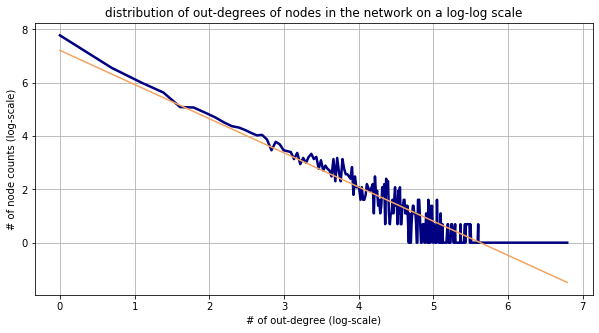

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# get out-degree distribution
degOutCntV = snap.TIntPrV()
snap.GetOutDegCnt(G1, degOutCntV)
x = [cnt.GetVal1() for cnt in degOutCntV if cnt.GetVal1() >= 1]
y = [cnt.GetVal2() for cnt in degOutCntV if cnt.GetVal1() >= 1]
xlog = np.log(x)
ylog = np.log(y)

# Compute and plot the least-square regression line for the out-degreedistribution
z = np.polyfit(xlog, ylog, 1)
fit = np.poly1d(z)

# plot out-degree distribution and its fitted line
f, ax = plt.subplots(figsize=(10,5))
plt.plot(xlog, ylog, linewidth=2.5, color='navy')
plt.plot(xlog, fit(xlog), linewidth=1.5, color='sandybrown')
plt.xlabel(r'# of out-degree (log-scale)')
plt.ylabel(r'# of node counts (log-scale)')
ax.grid(True)
plt.title(r'distribution of out-degrees of nodes in the network on a log-log scale')
plt.show()

## 2. Finding Experts on the Java Programming Language on StackOverflow
edge(a,b) means person a endorsed an answer from person b on a Java-related question

In [18]:
# Read graph data
G2 = snap.LoadEdgeList(snap.PNGraph, 'stackoverflow-Java.txt', 0, 1)

In [27]:
# The number of weakly connected components in the network
components = snap.TCnComV()
snap.GetWccs(G2, components)
print(f'# of wcc: {len(components)}')

# of wcc: 10143


In [29]:
# The number of edges and the number of nodes in the largest weakly connected component
GMx = snap.GetMxWcc(G2);
print(f'Max wcc # of nodes: {GMx.GetNodes()}, # of edges:{GMx.GetEdges()}')

Max wcc # of nodes: 131188, # of edges:322486


In [36]:
# IDs of the top 3 most central nodes in the network by PagePank scores.
PRankH = snap.TIntFltH()
snap.GetPageRank(G2, PRankH)
sorted([ (item, PRankH(item)) for item in PRankH], key=lambda x: x[1], reverse=True)[:3] 

[(992484, 0.013980540412209575),
 (135152, 0.010005538895741885),
 (22656, 0.007103532693128619)]

In [38]:
# IDs of the top 3 hubs and top 3 authorities in the network by HITS scores
NIdHubH = snap.TIntFltH()
NIdAuthH = snap.TIntFltH()
snap.GetHits(Graph, NIdHubH, NIdAuthH)
sorted([ (item, NIdHubH(item)) for item in NIdHubH], key=lambda x: x[1], reverse=True)[:3] 

[(48, 0.1762419853002481),
 (78, 0.16187675114492567),
 (84, 0.15753771654822954)]

In [40]:
# IDs of the top 3 authorities in the network by HITS scores
sorted([ (item, NIdAuthH(item)) for item in NIdAuthH], key=lambda x: x[1], reverse=True)[:3]

[(86, 0.2003257103582744), (18, 0.17411374271165628), (64, 0.1727864670736422)]